# Housing Price Prediction 

### Problem Statement:

Consider a real estate corporation with a dataset comprising property values in the Delhi area. It wants to use the data to optimise property selling prices based on crucial characteristics like space, bedrooms, parking, and so on.

Aim —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Data
Use housing dataset.

## Reading and Understanding the Data

In [293]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [294]:
data = pd.DataFrame(pd.read_csv("Housing.csv"))

In [295]:
# Check the head of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data overview

In [296]:
#Check the shape of dataset
data.shape

(545, 13)

In [297]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [298]:
# Describe Dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


This way we can quickly see basic metrics like average, median, percentile for different features.

In [299]:
# describe categorical values columns
data.describe(include = 'object').transpose()

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


## Data Cleaning

In [300]:
# Checking Null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [301]:
### Count the values 
for c in data.columns:
    print("---- %s ---" % c)
    print(data[c].value_counts())

---- price ---
4200000    17
3500000    17
4900000    12
3640000     9
3150000     9
           ..
5229000     1
6293000     1
8080940     1
6419000     1
1855000     1
Name: price, Length: 219, dtype: int64
---- area ---
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
5600     1
3570     1
2550     1
6650     1
4632     1
Name: area, Length: 284, dtype: int64
---- bedrooms ---
3    300
2    136
4     95
5     10
1      2
6      2
Name: bedrooms, dtype: int64
---- bathrooms ---
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
---- stories ---
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
---- mainroad ---
yes    468
no      77
Name: mainroad, dtype: int64
---- guestroom ---
no     448
yes     97
Name: guestroom, dtype: int64
---- basement ---
no     354
yes    191
Name: basement, dtype: int64
---- hotwaterheating ---
no     520
yes     25
Name: hotwaterheating, dtype: int64
---- airconditioning ---
no     373
yes    172
Name: aircond

In [302]:
# Checking for duplicate
data.duplicated().sum()

0

Observations:

1. Data size is (545,13)

2. None of the columns has Null values

3. There is not any duplicated value in housing dataset

4. 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking' has numerical values

5. 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' , 'prefarea' has yes/no values

6. 'furnishingstatus' has three values viz. 'furnished', 'semi-furnished', 'unfurnished'

## Exploratory Data Analytics


### Visualising Numeric Variables

Let's make a dist plot of all the numeric variables

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


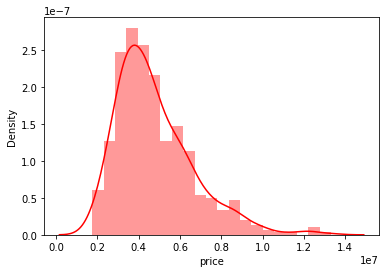

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


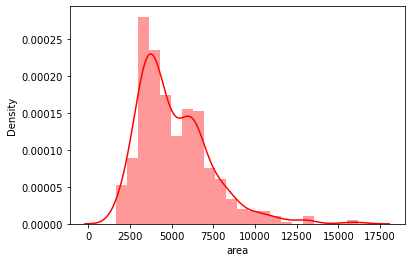

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


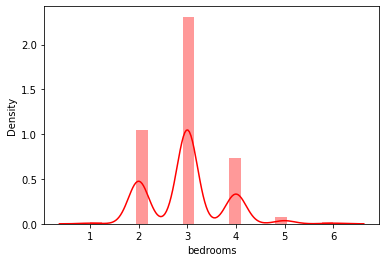

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


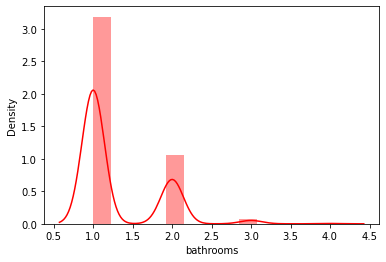

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


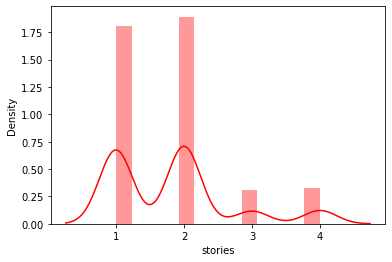

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


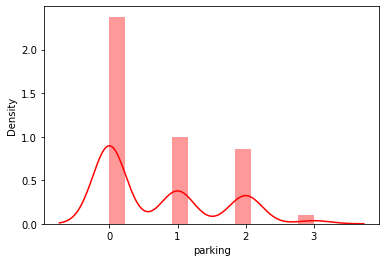

In [303]:
df_numerics_only = data.select_dtypes(include=np.number)
for column in df_numerics_only.columns:
    
    sns.distplot(data[column],color="red") # Stack these distributions together with different colors 
    plt.show()


Observations:

The Distplot of prize and area column are approximately normally distributed. And if we see other columns like bedroom, bathroom, stories, and parking these are not normally distributed.

#### Visualising Categorical Variables

There are a few categorical variables as well, as you may have seen. Let's depict some of these variables as a bar graph.

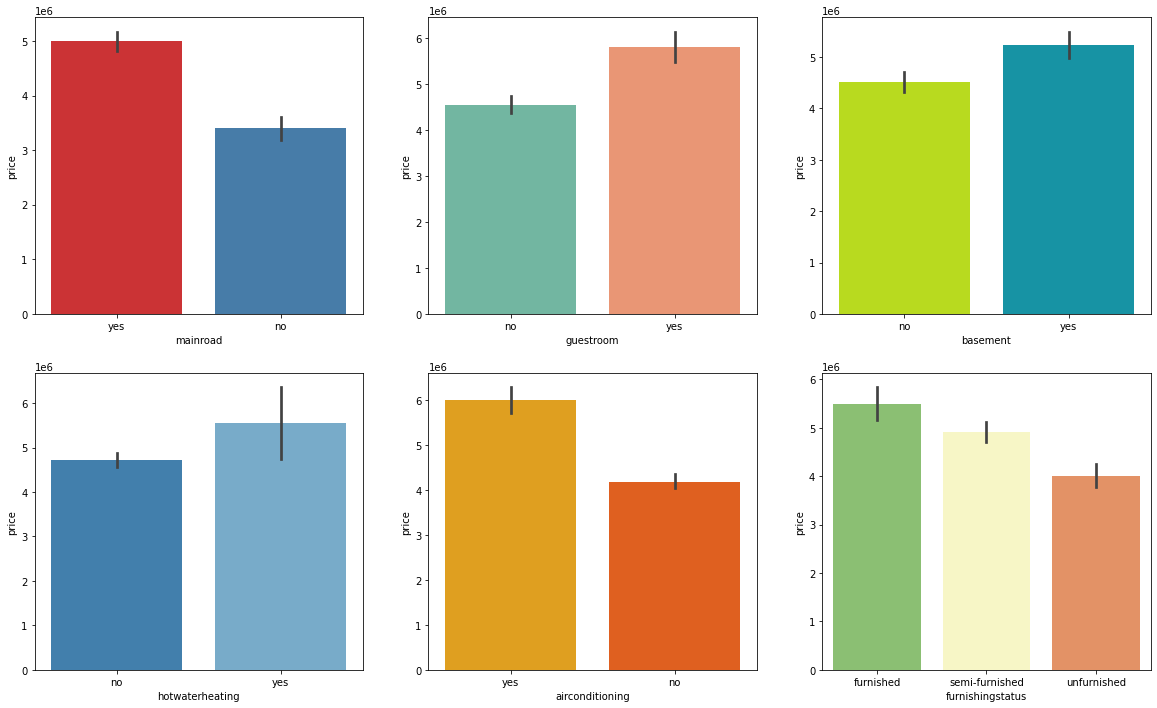

In [304]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'mainroad', y = 'price', data = data,palette='Set1')
plt.subplot(2,3,2)
sns.barplot(x = 'guestroom', y = 'price', data = data,palette='Set2')
plt.subplot(2,3,3)
sns.barplot(x = 'basement', y = 'price', data = data,palette='nipy_spectral_r')
plt.subplot(2,3,4)
sns.barplot(x = 'hotwaterheating', y = 'price', data = data,palette='tab20c')
plt.subplot(2,3,5)
sns.barplot(x = 'airconditioning', y = 'price', data = data,palette='autumn_r')
plt.subplot(2,3,6)
sns.barplot(x = 'furnishingstatus', y = 'price', data = data,palette='RdYlGn_r')
plt.show()

Observations:
1. The house is on road, their price is high.
2. Those houses which do not have guest room, their price is less.
3. Those houses which do not have basement, their price is less.
4. Those houses who provide hot waterheating fecalites , their price is High.
5. Those houses who provide furnishing , their price is High followed by semi furnished.

### Outlier Detection

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

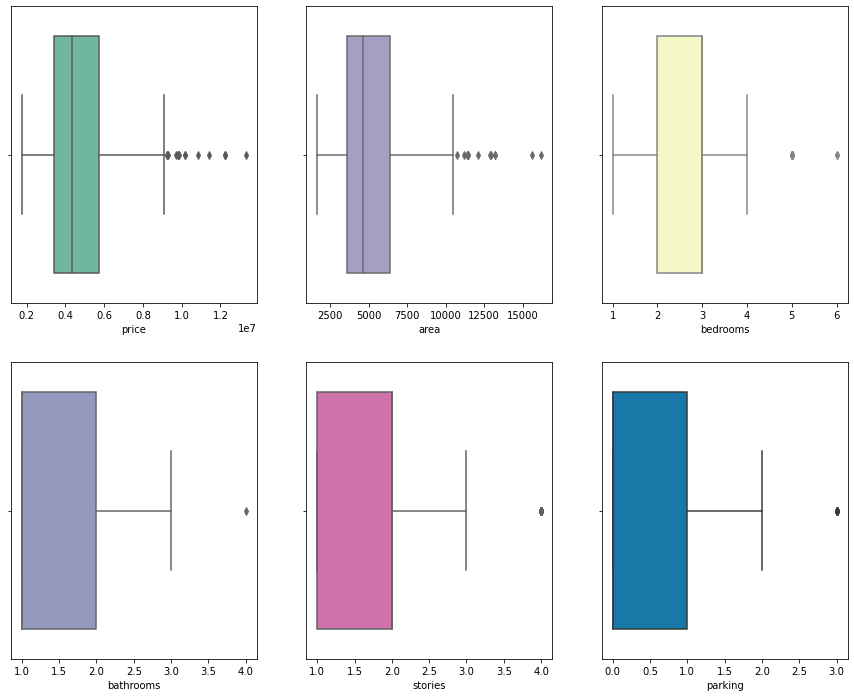

In [305]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (15,12))
plt1 = sns.boxplot(data['price'], ax = axs[0,0],palette='BuGn')
plt2 = sns.boxplot(data['area'], ax = axs[0,1],palette='Purples_r')
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2],palette='RdYlGn')
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0],palette='BuPu')
plt2 = sns.boxplot(data['stories'], ax = axs[1,1],palette='PuRd')
plt3 = sns.boxplot(data['parking'], ax = axs[1,2],palette='winter')

plt.show()

Outlier Treatment :
1. Price and area have considerable outliers.
2. We can drop the outliers as we have sufficient data.

In [306]:
# outlier treatment for price
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

In [307]:
# outlier treatment for area
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


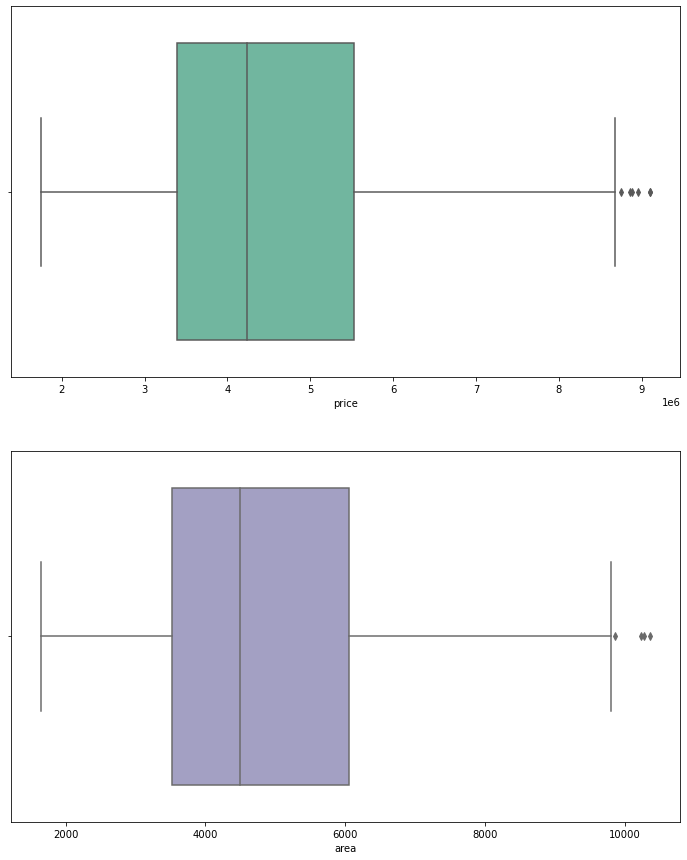

In [308]:
# Count column plots to map the dependence of 'Target' column on categorical features

plt.figure(figsize = (12,15))
plt.subplot(211)
plt1 = sns.boxplot(data['price'], palette='BuGn')
plt.subplot(212)
plt2 = sns.boxplot(data['area'], palette='Purples_r')
plt.show()

Here we removed lot of outliers, It's look good.

### Feature Selection Technique

#### Pearson correlation for numerical continous variable

In [309]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


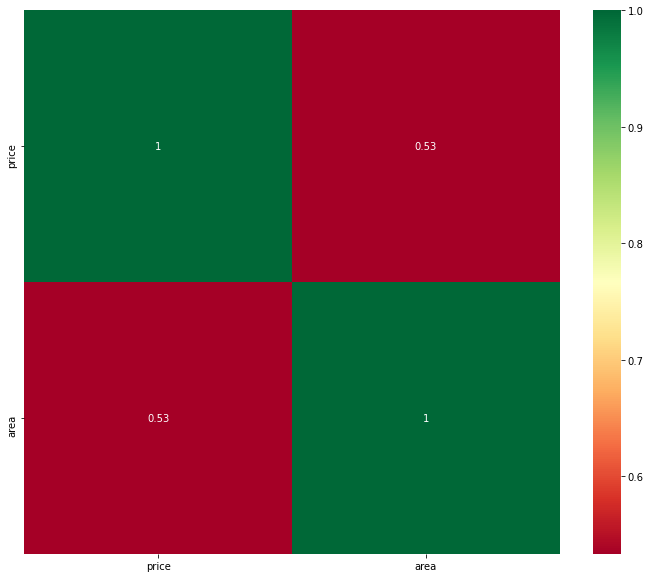

In [310]:
#Displaying Correlation between varaibles using heatmap
plt.figure(figsize=(12,10))
df1=data[['price','area']]
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

There is not avialible highely correlated variables.

### Handle Categorical Data

In [311]:
#Getting list of categorical variable
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [312]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting all categorical variable to numerical values
for feat in objList:
    data[feat] = le.fit_transform(data[feat])

In [313]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


There is no relationship bitween 'mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus' and Price

### Chi Square Test

Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.

In [314]:
df=data[['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

In [315]:
df['price_band'] = pd.cut(data['price'], 5)
df['price_band'].unique()

<ipython-input-315-544ffe8332ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_band'] = pd.cut(data['price'], 5)


[(7630000.0, 9100000.0], (6160000.0, 7630000.0], (4690000.0, 6160000.0], (3220000.0, 4690000.0], (1742650.0, 3220000.0]]
Categories (5, interval[float64]): [(1742650.0, 3220000.0] < (3220000.0, 4690000.0] < (4690000.0, 6160000.0] < (6160000.0, 7630000.0] < (7630000.0, 9100000.0]]

In [316]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Converting all categorical variable to numerical values
df['price_band'] = le.fit_transform(df['price_band'])

<ipython-input-316-e915bf4e5118>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_band'] = le.fit_transform(df['price_band'])


In [317]:
df['price_band'].unique()

array([4, 3, 2, 1, 0])

In [318]:
# Applying Chi Squared test
# importing the chi2 library
from sklearn.feature_selection import chi2

In [319]:
#split df dataset in features and target variable
x1=df.drop('price_band',axis='columns') # independent vatiable 
y1=df['price_band'] # dependent vatiable 

In [320]:
#returns f score and p value 
f_score = chi2(x1,y1) 

In [321]:
p_value = pd.Series(f_score[1],index = x1.columns)
# sort p value series
p_value = p_value.sort_values(ascending = True)
# print p value 
print(p_value)

airconditioning     6.314080e-17
parking             2.998021e-11
guestroom           1.450309e-09
stories             7.499362e-09
prefarea            1.729534e-08
furnishingstatus    6.011432e-06
basement            8.491327e-06
bathrooms           4.861440e-04
bedrooms            2.745378e-02
mainroad            9.893780e-02
hotwaterheating     3.585703e-01
dtype: float64


In [322]:
corr_columns=[]
significance_level = 0.05
for i in p_value.index:
    if p_value[i] <= significance_level: 
        print(i,'    :- Reject NULL HYPOTHESIS') 
    else: 
        print(i,'   :-ACCEPT NULL HYPOTHESIS')
        corr_columns.append(i)
        

airconditioning     :- Reject NULL HYPOTHESIS
parking     :- Reject NULL HYPOTHESIS
guestroom     :- Reject NULL HYPOTHESIS
stories     :- Reject NULL HYPOTHESIS
prefarea     :- Reject NULL HYPOTHESIS
furnishingstatus     :- Reject NULL HYPOTHESIS
basement     :- Reject NULL HYPOTHESIS
bathrooms     :- Reject NULL HYPOTHESIS
bedrooms     :- Reject NULL HYPOTHESIS
mainroad    :-ACCEPT NULL HYPOTHESIS
hotwaterheating    :-ACCEPT NULL HYPOTHESIS


If we see above we can conclude that airconditioning, parking, guestroom, stories, prefarea, furnishingstatus, basement, bathrooms and bedrooms features has p_value <= 0.05 hence they have have significance on target variable.

So we will only select airconditioning, parking, guestroom, stories, prefarea, furnishingstatus, basement, bathrooms and bedrooms for further machine learning modeling.

In [323]:
#dropping columns that will not add any value to prediction 
data.drop(labels=corr_columns,axis=1,inplace=True) 

In [324]:
data.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,1,1,2
17,8960000,8500,3,2,4,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,0,1,2,0,0
19,8855000,6420,3,2,2,0,0,1,1,1,1


In [325]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

### Feature Scaling

In [326]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()

data[['price', 'area']] = scaler.fit_transform(data[['price', 'area']])
print("Scaled Dataset Using MinMaxScaler")
data.head()

Scaled Dataset Using MinMaxScaler


,price,area,bedrooms,bathrooms,stories,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
15,2.843893,0.624429,4,1,2,0,1,0,2,0,1
16,2.843893,0.961991,4,2,2,1,1,1,1,1,2
17,2.756024,2.030937,3,2,4,0,0,1,2,0,0
18,2.712090,-0.163216,3,2,2,1,0,1,2,0,0
19,2.690123,0.860722,3,2,2,0,0,1,1,1,1


### Data Spliting

In [327]:
#split dataset in features and target variable
X = data.drop('price',axis='columns')
y = data['price']

In [328]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=151)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((361, 10), (156, 10), (361,), (156,))

### Model Building

In [329]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train) #actually produces the linear eqn for the data


LinearRegression()

In [330]:
y_pred = regressor.predict(X_test) 

In [331]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 0.4615159647315322
Mean Squared Error : 0.37609869308939764
Root Mean Squared Error :  0.6132688587311422


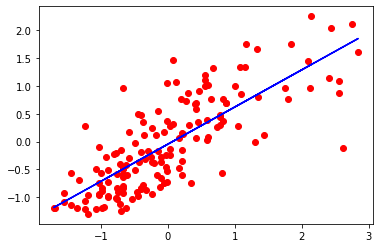

In [332]:
#find line of best fit
a, b = np.polyfit(y_test,y_pred, 1)

#add points to plot
plt.scatter(y_test,y_pred,c="r")

#add line of best fit to plot
plt.plot(y_test, a*y_test+b,c="b") 

In the above  plot, we see data is in a line form, which means our model has done good predictions.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

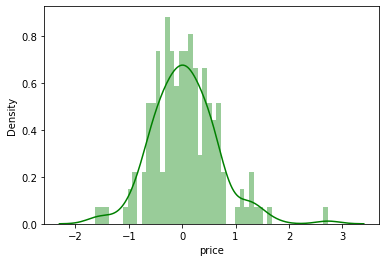

In [333]:
sns.distplot((y_test-y_pred),bins=50,color="g")

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.